# Keras ile Vücut Kitle İndeksi Veri Seti

İlk olarak gerekli kütüphaneler import edildi. (Veri işleme kısmında MLP uygulamasında yapılan tüm veri işlemleri Keras için de tekrar edildi.)

In [27]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
import tensorflow as tf
import keras
import sklearn.metrics as metrics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from keras import Sequential
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [7]:
df=pd.read_csv("bmi.csv")

In [8]:
df.head()

Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [10]:
#gender kısmı o ve 1 değişkenlerine dönüştürüldü. 'object istenmediği için'
df.Gender.replace(['Male','Female'],[0,1],inplace = True)

In [11]:
df.head()

Gender  Height  Weight  Index
0       0     174      96      4
1       0     189      87      2
2       1     185     110      4
3       1     195     104      3
4       0     149      61      3

In [12]:
#sütunların isimleri

df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [13]:
#çıktı


df['Index']

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [14]:
#data bilgisi

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int64
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
 3   Index   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [15]:
df.describe()

Gender      Height      Weight       Index
count  500.000000  500.000000  500.000000  500.000000
mean     0.510000  169.944000  106.000000    3.748000
std      0.500401   16.375261   32.382607    1.355053
min      0.000000  140.000000   50.000000    0.000000
25%      0.000000  156.000000   80.000000    3.000000
50%      1.000000  170.500000  106.000000    4.000000
75%      1.000000  184.000000  136.000000    5.000000
max      1.000000  199.000000  160.000000    5.000000

In [16]:
df.shape

(500, 4)

In [17]:
#eksik değerlerin konrolü eksik deper bulunmamakta

eksik=df.isnull().sum()
eksik_tablo = pd.DataFrame({"Eksik Değer Sayısı" : eksik})
eksik_tablo

Eksik Değer Sayısı
Gender                   0
Height                   0
Weight                   0
Index                    0

In [18]:
#bağımlı ve bağımsız değişkenler

X = df.drop('Index', axis = 1)
y = df['Index']

In [19]:
#bu kısım kategorik her veriye sayısal bir değer atamak  gerektiği için kerasta yapılmalıdır.

from keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder

nsp_classes = y.unique()
nsp_classes

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)
print(y)

y.shape


[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


(500, 6)

In [20]:
#ölçeklednirme

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
X.shape

(500, 3)

In [21]:
#eğitim ve test olarak set ayrıldı

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
#gerekli kütüphaneler

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

In [23]:
#sıralı model

def create_classifier(optimizer="adam"):
    classifier = Sequential() 
    classifier.add(Dense(units = 3, activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(units = 2, activation = 'relu'))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(units = 6, activation = 'softmax'))
    classifier.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
    return classifier

#compile model
classifier = create_classifier()


history = classifier.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=100 ,verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 172ms/step - loss: 1.9048 - accuracy: 0.2475 - val_loss: 1.8842 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 1.9090 - accuracy: 0.2800 - val_loss: 1.8775 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1.8858 - accuracy: 0.2925 - val_loss: 1.8712 - val_accuracy: 0.2000
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 1.8894 - accuracy: 0.2850 - val_loss: 1.8647 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 1.8788 - accuracy: 0.2975 - val_loss: 1.8583 - val_accuracy: 0.2000
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 1.8599 - accuracy: 0.2875 - val_loss: 1.8520 - val_accuracy: 0.2000
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.8644 - accuracy: 0.2975 - val_loss: 1.8458 - val_accuracy: 0.2000
Epoch 8/100
4/4 [==

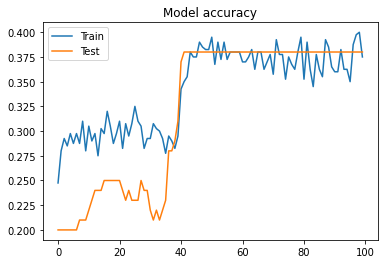

In [28]:
#accuracy grafiği


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

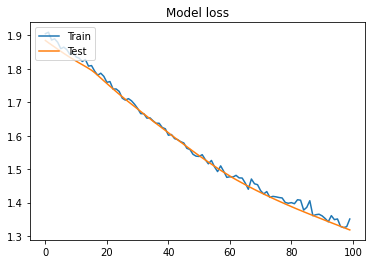

In [29]:
#loss grafiği

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [30]:
import sklearn.metrics as metrics
y_pred=classifier.predict_classes(X_test)

In [42]:
#acc
from sklearn.metrics import accuracy_score
acc=metrics.accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:",acc)

Accuracy: 0.38


In [61]:
#f1
print("f1:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted'))

f1: 0.2615443745632425


In [32]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(cm)

[[ 0  0  0  0  3  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  9  4]
 [ 0  0  0  0  0 20]
 [ 0  0  0  0  0 23]
 [ 0  0  0  0  0 38]]


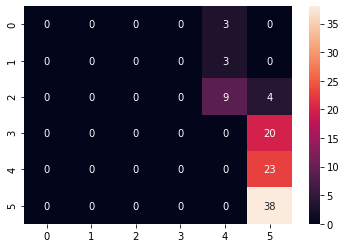

In [35]:
#görselleştirme
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('hm.png')

# grid search

In [36]:
from sklearn.model_selection import GridSearchCV

#gerekli parametreler
param_grid = {
   
    'epochs': [1,10,20], 
    'batch_size':[1,10,30],
    'optimizer':['RMSprop', 'Adam','SGD'],
    
}


In [37]:
# KerasClassifier ile modeli oluşturma 
grid_cv = KerasClassifier(build_fn=create_classifier, verbose=1)

In [38]:
gridsearch=GridSearchCV(estimator = grid_cv,
                        param_grid = param_grid,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

In [39]:
grid_cv_model = gridsearch.fit(X_train, y_train)

400/400 [==============================] - 1s 3ms/step - loss: 1.7671 - accuracy: 0.3950


In [40]:
#en iyi parametreler belirlendi.
print(grid_cv_model.best_params_)

{'batch_size': 1, 'epochs': 1, 'optimizer': 'RMSprop'}


In [54]:
y_pred = grid_cv_model.predict(X_test) 

100/100 [==============================] - 0s 2ms/step


In [56]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(grid_cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')

Epoch 1/20
80/80 [==============================] - 0s 2ms/step - loss: 1.8783 - accuracy: 0.2500
Epoch 2/20
80/80 [==============================] - 0s 2ms/step - loss: 1.7777 - accuracy: 0.2500
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 1.6833 - accuracy: 0.3250
Epoch 4/20
80/80 [==============================] - 0s 2ms/step - loss: 1.6363 - accuracy: 0.3375
Epoch 5/20
80/80 [==============================] - 0s 2ms/step - loss: 1.6022 - accuracy: 0.3625
Epoch 6/20
80/80 [==============================] - 0s 2ms/step - loss: 1.5622 - accuracy: 0.4375
Epoch 7/20
80/80 [==============================] - 0s 2ms/step - loss: 1.5434 - accuracy: 0.4125
Epoch 8/20
80/80 [==============================] - 0s 2ms/step - loss: 1.4623 - accuracy: 0.5000
Epoch 9/20
80/80 [==============================] - 0s 2ms/step - loss: 1.4625 - accuracy: 0.4875
Epoch 10/20
80/80 [==============================] - 0s 2ms/step - loss: 1.4397 - accuracy: 0.4250
Epoch 11/20
80/80 [

In [57]:
print('K-fold Cross Val Accuracy Sonuç: ', results)

K-fold Cross Val Accuracy Sonuç:  [0.8  0.   0.55 0.3  0.15]


In [60]:
print('K-fold Cross Val Accuracy Ort: ', results.mean())

K-fold Cross Val Accuracy Ort:  0.36


In [63]:
results = cross_val_score(grid_cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring="f1_weighted")

20/20 [==============================] - 0s 2ms/step
Epoch 1/20
8/8 [==============================] - 0s 3ms/step - loss: 1.8094 - accuracy: 0.1500
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - loss: 1.8161 - accuracy: 0.3250
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 1.8143 - accuracy: 0.3375
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 1.8158 - accuracy: 0.3000
Epoch 5/20
8/8 [==============================] - 0s 3ms/step - loss: 1.8136 - accuracy: 0.3125
Epoch 6/20
8/8 [==============================] - 0s 3ms/step - loss: 1.8041 - accuracy: 0.2875
Epoch 7/20
8/8 [==============================] - 0s 3ms/step - loss: 1.7920 - accuracy: 0.3000
Epoch 8/20
8/8 [==============================] - 0s 3ms/step - loss: 1.7723 - accuracy: 0.3625
Epoch 9/20
8/8 [==============================] - 0s 4ms/step - loss: 1.7668 - accuracy: 0.3375
Epoch 10/20
8/8 [==============================] - 0s 3ms/step - loss: 1.7639 - acc

In [64]:
print('K-fold Cross Val f1 Ort: ', results.mean())

K-fold Cross Val f1 Ort:  0.2627389108476065


In [65]:
y_pred = grid_cv_model.predict(X_test) 


# f1 score
import sklearn.metrics as metrics
print("f1:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted'))


100/100 [==============================] - 0s 2ms/step
f1: 0.2615443745632425


In [68]:
y_score = grid_cv_model.predict_proba(X_test)

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Instructions for updating:
Please use `model.predict()` instead.
100/100 [==============================] - 0s 2ms/step


In [78]:
#roc_curve, auc eğrisi

from sklearn.metrics import roc_curve, auc

nc = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nc):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])




In [79]:

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [80]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

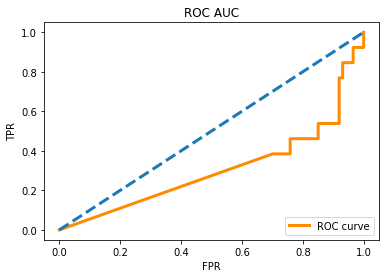

In [98]:
lw = 3
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve' % roc_auc[2])
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC')
plt.legend(loc="lower right")
plt.show()